#### Datasource: https://www.finra.org/investors/learn-to-invest/advanced-investing/margin-statistics

In [58]:
import os
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
from datetime import datetime

%matplotlib inline

In [62]:
FILE_XLSX = r'./data/margin-statistics.xlsx'
dateparse = lambda x: datetime.strptime(x, '%Y-%m')

In [63]:
file = pd.ExcelFile(FILE_XLSX)
margin_df = file.parse("Customer Margin Balances", parse_dates=['Year-Month'], date_parser=dateparse)
margin_df['Year-Month'] = margin_df['Year-Month'] + pd.offsets.MonthEnd(0) 
margin_df.columns = ['Date', 'Debit_Balances', 'Free_Credit_Balances_Cash', 'Free_Credit_Balances_Margin']
margin_df['month'] = margin_df['Date'].dt.month
margin_df = margin_df.set_index('Date')
margin_df.sort_index(ascending=True, inplace=True)
margin_df.head()

,Debit_Balances,Free_Credit_Balances_Cash,Free_Credit_Balances_Margin,month
Date,,,,
1997-01-31,103337,68856,NaN,1
1997-02-28,103886,67058,NaN,2
1997-03-31,104835,69553,NaN,3
1997-04-30,102842,64825,NaN,4
1997-05-31,111097,66879,NaN,5


In [64]:
margin_df['YOY'] = margin_df.groupby(['month'])['Debit_Balances'].diff()
margin_df['YOY_pct'] = margin_df.groupby(['month'])['Debit_Balances'].pct_change()
margin_df.tail()

,Debit_Balances,Free_Credit_Balances_Cash,Free_Credit_Balances_Margin,month,YOY,YOY_pct
Date,,,,,,
2020-10-31,659313,193293,217739.0,10,104709.0,0.188800
2020-11-30,722118,200723,221567.0,11,158636.0,0.281528
2020-12-31,778037,224987,227127.0,12,198816.0,0.343247
2021-01-31,798605,224133,241220.0,1,236793.0,0.421481
2021-02-28,813680,220840,240481.0,2,268553.0,0.492643


In [65]:
margin_df = margin_df.drop(columns=['Free_Credit_Balances_Cash','Free_Credit_Balances_Cash'])

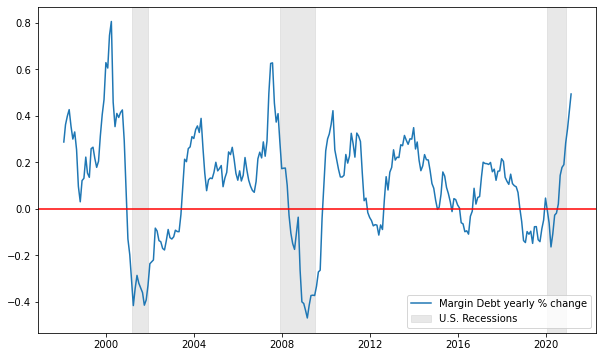

In [66]:
def plot_chart(data,text):
    plt.figure(figsize=(10,6))
    plt.plot(data,label=text)
    plt.axhline(y=0., color='r', linestyle='-')
    plt.axvspan(datetime(2001,3,1), datetime(2001,11,30), 
                alpha=0.5, color='lightgray', 
                label="U.S. Recessions")
    plt.axvspan(datetime(2007,12,1), datetime(2009,6,30), 
                alpha=0.5, color='lightgray')
    plt.axvspan(datetime(2020,2,1), datetime(2020,12,1), 
                alpha=0.5, color='lightgray')
    plt.legend(loc='lower right')
    plt.show()
    
plot_chart(margin_df.YOY, 'Margin Debt yearly change')

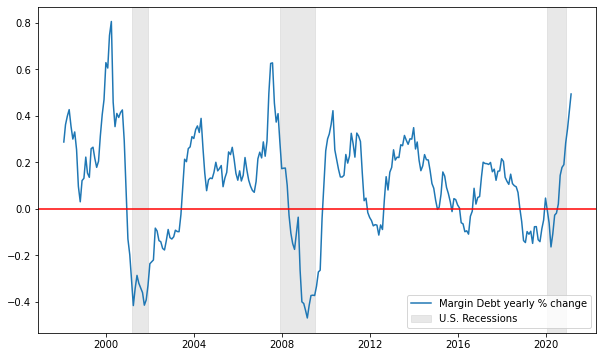

In [67]:
plot_chart(margin_df.YOY_pct, 'Margin Debt yearly % change')